In [167]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [168]:
#data frame creation
ds=pd.read_csv('diabetes.csv')
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [169]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [170]:
#shape of the data
ds.shape
print (f"There are {ds.shape} rows and columns")

There are (768, 9) rows and columns


In [171]:
#size of the data
ds.size
print (f"There are {ds.size} atributes in data")

There are 6912 atributes in data


In [172]:
#Columns of the data
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [173]:
#data types
ds.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [174]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [175]:
ds.describe().round(2).style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850000,120.890000,69.110000,20.540000,79.800000,31.990000,0.470000,33.240000,0.350000
std,3.370000,31.970000,19.360000,15.950000,115.240000,7.880000,0.330000,11.760000,0.480000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [176]:
#checking for null values
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [177]:
#checking for duplicate values
ds.duplicated().sum()

0

In [178]:
dimension_variable = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
ds[dimension_variable] = ds[dimension_variable].replace(0,np.NaN)

In [179]:
ds.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [180]:
def missing_values(dataframe, na_name=False):
    na_cols = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_cols].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_cols].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_ds = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_ds, end="\n")

    if na_name:
        return na_cols

missing_values(ds)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [181]:
na_col = missing_values(ds, True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [182]:
def missingvalues_vs_targetvariable(dataframe, target, na_cols):
    temp_ds = dataframe.copy()
    for col in na_cols:
        temp_ds[col + '_NA_FLAG'] = np.where(temp_ds[col].isnull(), 1, 0)

    na_flag = temp_ds.loc[:, temp_ds.columns.str.contains("_NA_")].columns

    for col in na_flag:
        print(pd.DataFrame({"TARGET_MEAN": temp_ds.groupby(col)[target].mean(),
                            "Count": temp_ds.groupby(col)[target].count()}), end="\n\n\n")


missingvalues_vs_targetvariable(ds, "Outcome", na_col)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




In [183]:
ds["Glucose"] = ds["Glucose"].fillna(ds["Glucose"].median())
ds["BloodPressure"] = ds["BloodPressure"].fillna(ds["BloodPressure"].median())
ds["BMI"] = ds["BMI"].fillna(ds["BMI"].median())

In [184]:
ds.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [185]:
dss = pd.get_dummies(ds[["Insulin","SkinThickness"]], drop_first=True)

In [186]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [187]:
scaler = MinMaxScaler()
dss = pd.DataFrame(scaler.fit_transform(dss), columns=dss.columns)
dss.head()

,Insulin,SkinThickness
0,NaN,0.304348
1,NaN,0.239130
2,NaN,NaN
3,0.096154,0.173913
4,0.185096,0.304348


In [188]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [189]:
dss = pd.DataFrame(imputer.fit_transform(dss), columns=dss.columns)
dss.head()

,Insulin,SkinThickness
0,0.240144,0.304348
1,0.243269,0.239130
2,0.170130,0.240798
3,0.096154,0.173913
4,0.185096,0.304348


In [190]:
dss = pd.DataFrame(scaler.inverse_transform(dss), columns=dss.columns)
dss.head()

,Insulin,SkinThickness
0,213.800000,35.00000
1,216.400000,29.00000
2,155.548223,29.15342
3,94.000000,23.00000
4,168.000000,35.00000


In [191]:
ds["Insulin"] = dss["Insulin"]
ds["SkinThickness"]= dss["SkinThickness"]

In [192]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [193]:
ds.loc[(ds['Glucose'] < 70), 'Glucose_Cate'] ="hipoglisemia"
ds.loc[(ds['Glucose'] >= 70) & (ds['Glucose'] < 100) , 'Glucose_Cate'] ="normal"
ds.loc[(ds['Glucose'] >= 100) & (ds['Glucose'] < 126) , 'Glucose_Cate'] ="imparied glucose"
ds.loc[(ds['Glucose'] >= 126), 'Glucose_Cate'] ="hiperglisemia"

In [194]:
ds.groupby("Glucose_Cate").agg({"Outcome": ["mean","count"]})

Outcome      
                      mean count
Glucose_Cate                    
hiperglisemia     0.592593   297
hipoglisemia      0.000000    11
imparied glucose  0.279570   279
normal            0.077348   181

In [195]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Cate
0,6,148.0,72.0,35.00000,213.800000,33.6,0.627,50,1,hiperglisemia
1,1,85.0,66.0,29.00000,216.400000,26.6,0.351,31,0,normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,hiperglisemia
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,hiperglisemia


In [196]:
ds.loc[(ds['Age'] >= 18) & (ds['Age'] < 30) , 'Age_cate'] ="young_women"
ds.loc[(ds['Age'] >= 30) & (ds['Age'] < 45) , 'Age_cate'] ="mature_women"
ds.loc[(ds['Age'] >= 45) & (ds['Age'] < 65) , 'Age_cate'] ="middle_aged_women"
ds.loc[(ds['Age'] >= 65) & (ds['Age'] < 75) , 'Age_cate'] ="old_women"
ds.loc[(ds['Age'] >= 75) , 'Age_cate'] ="eldest_women"

In [197]:
ds.groupby("Age_cate").agg({"Outcome": ["mean","count"]})

Outcome      
                       mean count
Age_cate                         
eldest_women       0.000000     1
mature_women       0.493724   239
middle_aged_women  0.529915   117
old_women          0.266667    15
young_women        0.212121   396

In [198]:
ds.loc[(ds['BMI'] < 16), 'Bmi_cate'] ="overweak"
ds.loc[(ds['BMI'] >= 16) & (ds['BMI'] < 18.5) , 'Bmi_cate'] ="weak"
ds.loc[(ds['BMI'] >= 18.5) & (ds['BMI'] < 25) , 'Bmi_cate'] ="normal"
ds.loc[(ds['BMI'] >= 25) & (ds['BMI'] < 30) , 'Bmi_cate'] ="Overweight"
ds.loc[(ds['BMI'] >= 30) & (ds['BMI'] < 35) , 'Bmi_cate'] ="Obese"
ds.loc[(ds['BMI'] >= 35) & (ds['BMI'] < 45) , 'Bmi_cate'] ="Over_Obese"
ds.loc[(ds['BMI'] >= 45), 'Bmi_cate'] ="Very_Obese"

In [199]:
ds.groupby("Bmi_cate").agg({"Outcome": ["mean","count"]})

Outcome      
                mean count
Bmi_cate                  
Obese       0.438298   235
Over_Obese  0.452830   212
Overweight  0.223464   179
Very_Obese  0.611111    36
normal      0.068627   102
weak        0.000000     4

In [200]:
ds.loc[(ds['BloodPressure'] < 70)  , 'BloodPressure_Cate'] ="low"
ds.loc[(ds['BloodPressure'] >= 70) & (ds['BMI'] < 90) , 'BloodPressure_Cate'] ="normal"
ds.loc[(ds['BloodPressure'] >= 90 ) , 'BloodPressure_Cate'] ="high"

In [201]:
ds.groupby("BloodPressure_Cate").agg({"Outcome": ["mean","count"]})

Outcome      
                        mean count
BloodPressure_Cate                
high                0.483333    60
low                 0.247350   283
normal              0.397647   425

In [202]:
ds.loc[(ds['Insulin'] < 120)  , 'Insulin_Cate'] ="normal"
ds.loc[(ds['Insulin'] >= 120) , 'Insulin_Cate'] ="abnormal"

In [203]:
ds.groupby("Insulin_Cate").agg({"Outcome": ["mean","count"]})

Outcome      
                  mean count
Insulin_Cate                
abnormal      0.423077   546
normal        0.166667   222

In [204]:
ds.loc[(ds['Pregnancies'] == 0)  , 'Pregnancy_Cate'] ="unpregnant"
ds.loc[(ds['Pregnancies'] > 0 ) & (ds['Pregnancies'] <= 5)  , 'Pregnancy_Cate'] ="normal"
ds.loc[(ds['Pregnancies'] > 5 ) & (ds['Pregnancies'] <= 10 )  , 'Pregnancy_Cate'] ="high"
ds.loc[(ds['Pregnancies'] > 10 )  , 'Pregnancy_Cate'] ="very high"

In [205]:
ds.groupby("Pregnancy_Cate").agg({"Outcome": ["mean","count"]})

Outcome      
                    mean count
Pregnancy_Cate                
high            0.491892   185
normal          0.271689   438
unpregnant      0.342342   111
very high       0.588235    34

In [206]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Cate,Age_cate,Bmi_cate,BloodPressure_Cate,Insulin_Cate,Pregnancy_Cate
0,6,148.0,72.0,35.00000,213.800000,33.6,0.627,50,1,hiperglisemia,middle_aged_women,Obese,normal,abnormal,high
1,1,85.0,66.0,29.00000,216.400000,26.6,0.351,31,0,normal,mature_women,Overweight,low,abnormal,normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,hiperglisemia,mature_women,normal,low,abnormal,high
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,normal,young_women,Overweight,low,normal,normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,hiperglisemia,mature_women,Over_Obese,low,abnormal,unpregnant


In [207]:
corr = ds.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.082989,0.058385,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192925,0.419825,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.192837,0.071964,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.082989,0.192925,0.192837,1.000000,0.180789,0.542438,0.100966,0.127872,0.215299
Insulin,0.058385,0.419825,0.071964,0.180789,1.000000,0.184999,0.100395,0.123735,0.226035
BMI,0.021559,0.231049,0.281257,0.542438,0.184999,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.100966,0.100395,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.127872,0.123735,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.215299,0.226035,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

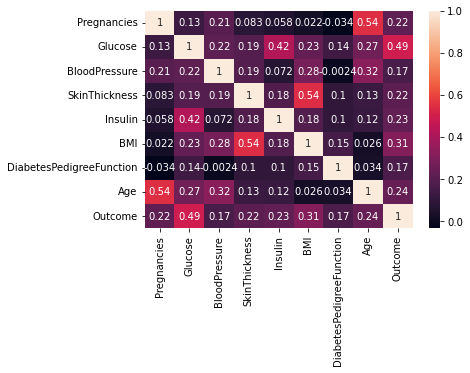

In [208]:
sns.heatmap(corr, annot=True)

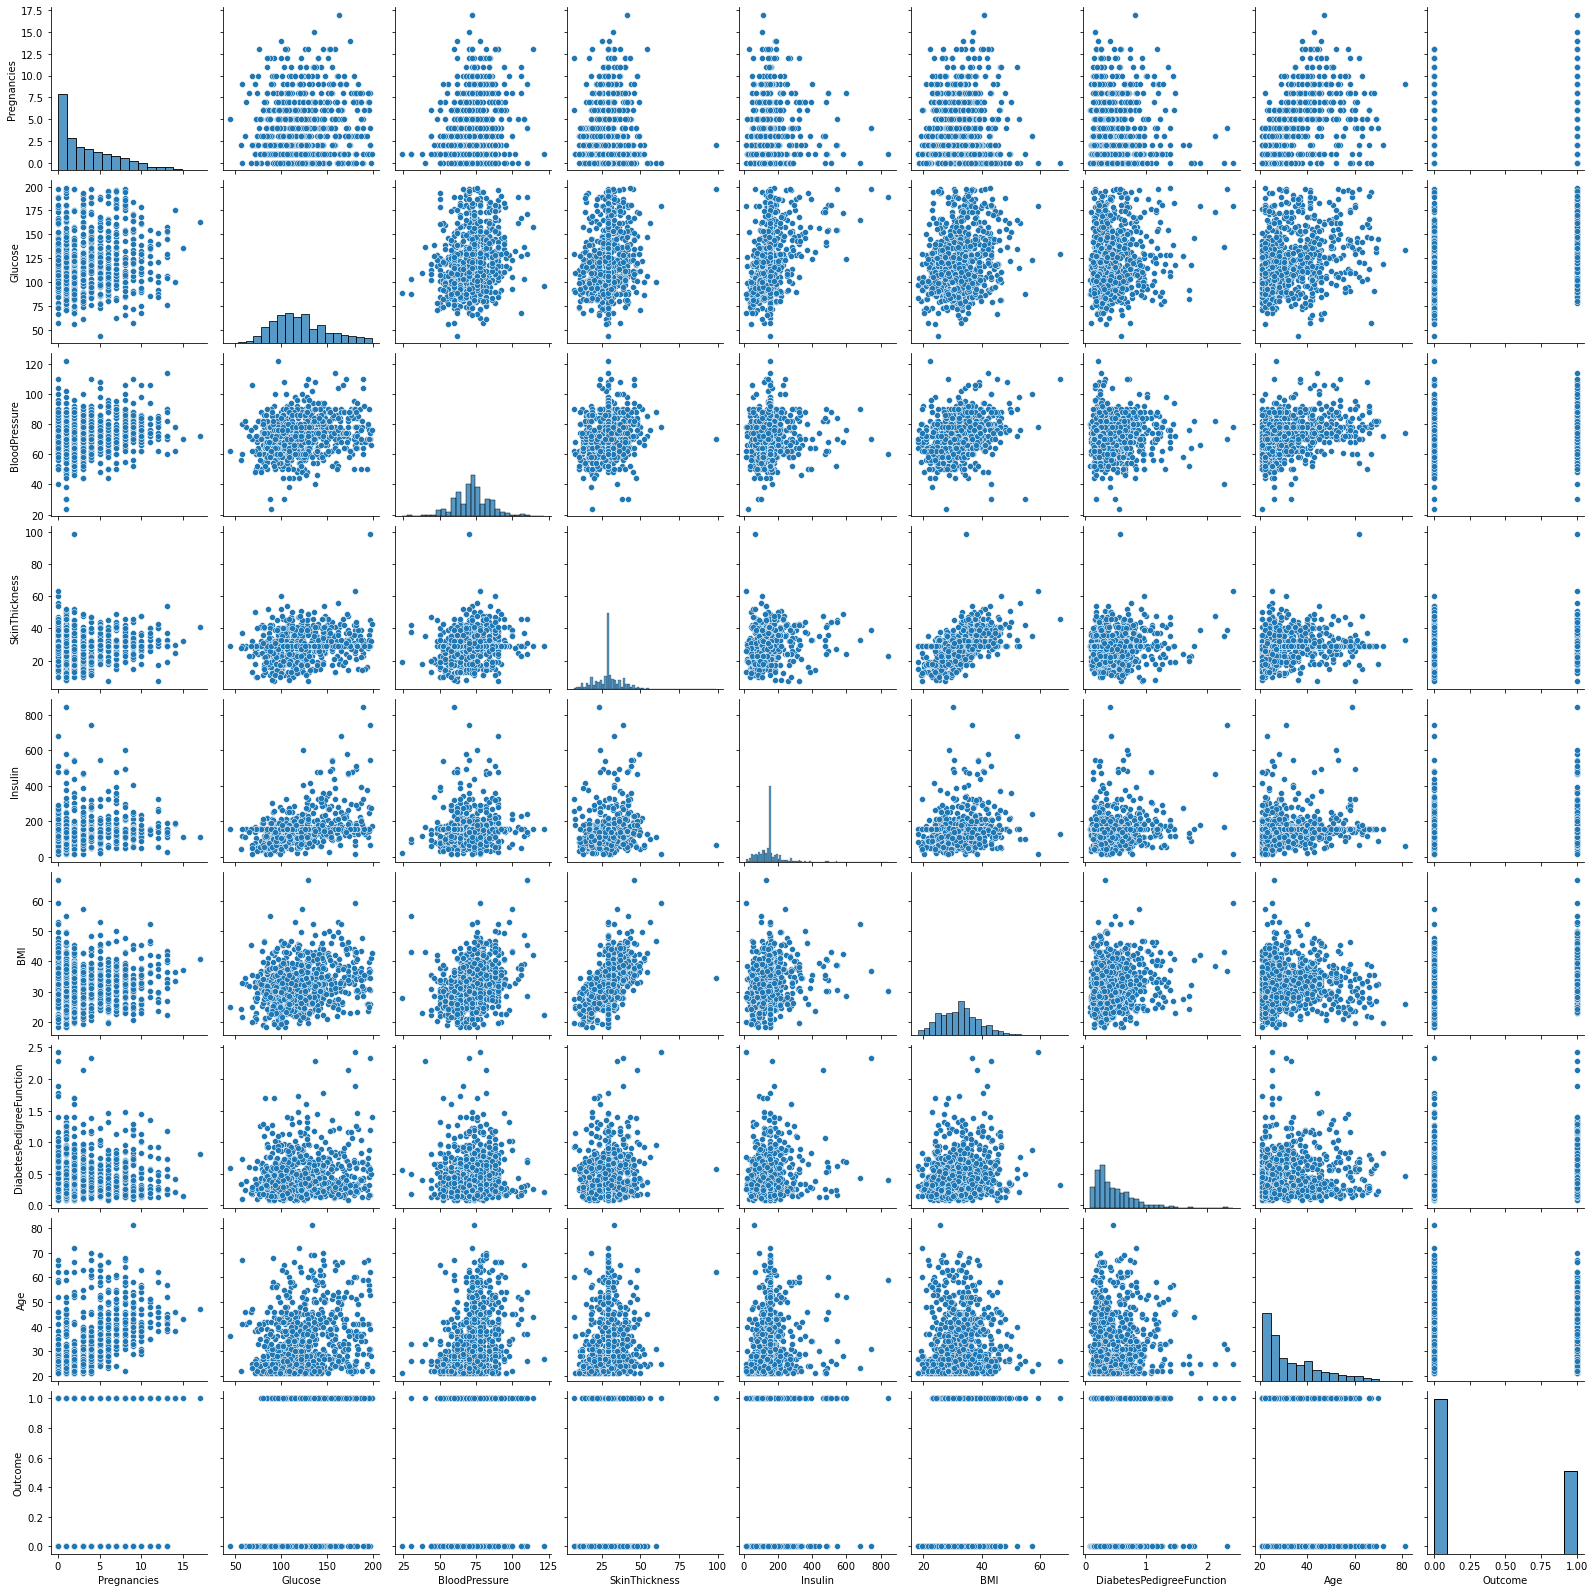

In [209]:
sns.pairplot(data=ds)

In [211]:
list=["No Diabetes","Diabetes"]
d=ds["Outcome"].value_counts().tolist()
values = [d[0], d[1]]
fig = px.pie(values=ds['Outcome'].value_counts(), names=list , width=800, height=400, color_discrete_sequence=["darkblue","black"]
             ,title="Pie chart of Diabetes")
fig.show()

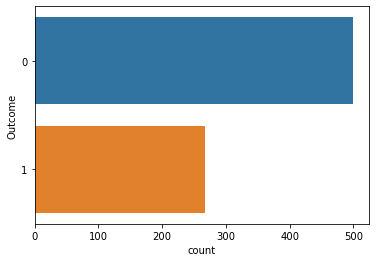

In [212]:
ax = sns.countplot(y="Outcome", data=ds)

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Glucose', ylabel='Density'>

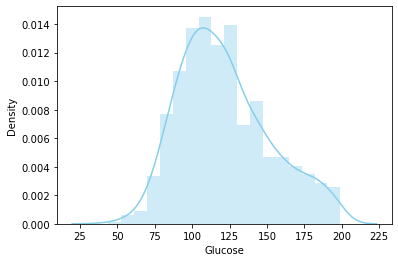

In [213]:
sns.distplot(ds['Glucose'],color ="Skyblue" )

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

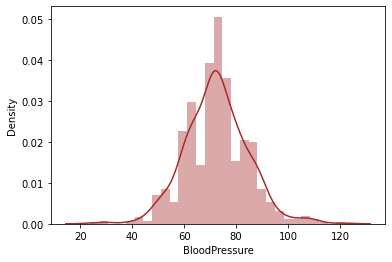

In [214]:
sns.distplot(ds['BloodPressure'], color = 'brown')

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Insulin', ylabel='Density'>

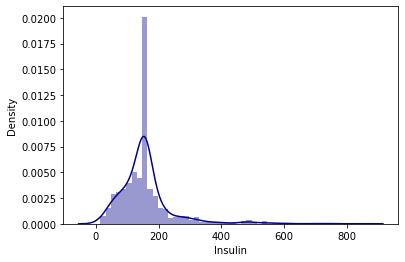

In [215]:
sns.distplot(ds['Insulin'],color ="darkblue" )

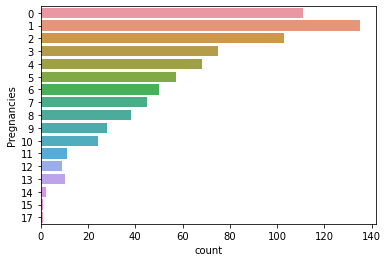

In [216]:
ax = sns.countplot(y="Pregnancies", data=ds)

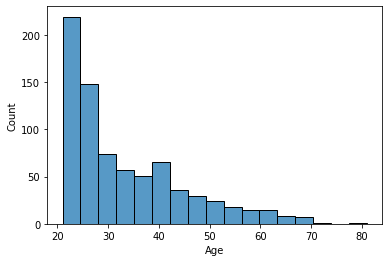

In [217]:
ax = sns.histplot(ds["Age"])
plt.show()